PCA

In [19]:
import pandas as pd

# Loading the dataset
emnist_ds = pd.read_csv("emnist-byclass-test.csv", header=None)

# Define the number of rows to sample
sample_size = 10000

# Randomly sample the rows from the dataset
sampled_ds = emnist_ds.sample(n=sample_size)

# Save the sampled dataset to a new CSV file
# sampled_df.to_csv("emnist-sample.csv", header=False, index=False)
sampled_ds

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
116164,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53236,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106897,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37075,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33171,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36389,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31852,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28509,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


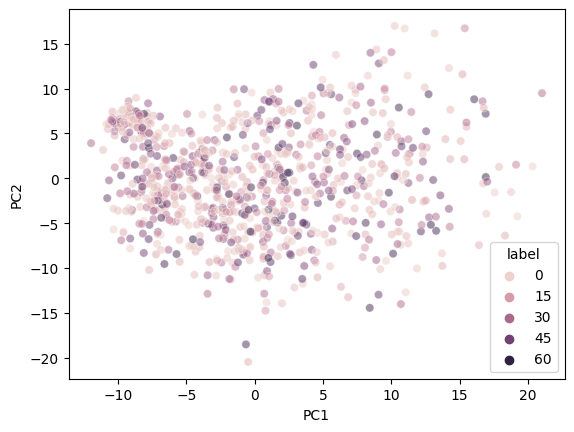

In [21]:
# Split the dataset into features (X) and labels (y)
X = sampled_ds.iloc[:, 1:]
y = sampled_ds.iloc[:, 0]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', alpha=0.5)
plt.show()


In [22]:
from sklearn.manifold import TSNE
# Split the dataset into features (X) and labels (y)
X = sampled_ds.iloc[:, 1:]
y = sampled_ds.iloc[:, 0]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Create a new DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['label'] = y

# Save the t-SNE results to a new CSV file
tsne_df.to_csv("emnist-byclass-tsne.csv", index=False)




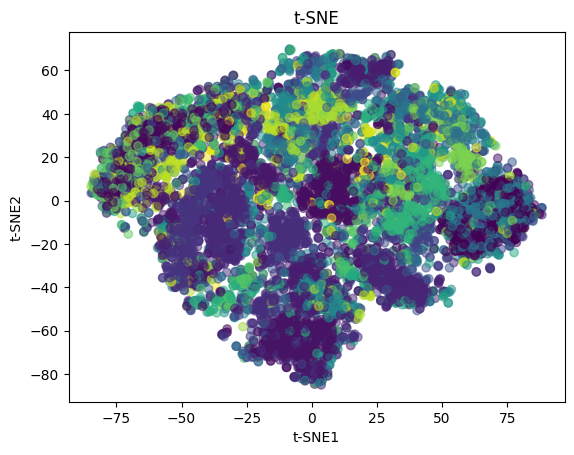

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE')
plt.show()